In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from config import *
from models import Generator, Discriminator, GRelu, JRelu
# from torch_datasets import quickdraw_ds, quickdraw_dl
from training import train
from utils import (show_batch, show_img, show_samples, render_samples, 
                   plot_output)

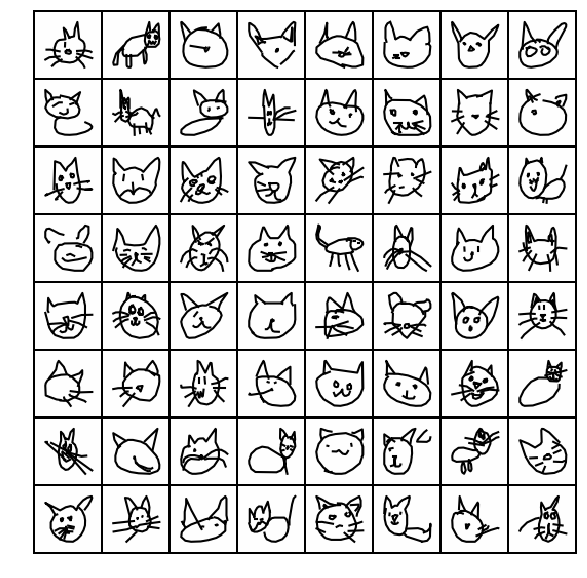

In [3]:
show_batch(quickdraw_dl)

In [19]:
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)

output = train(60, quickdraw_dl, sample_dir='quickdraw_samples',
               sample_freq=5, gd_ratio=2, g=g, d=d)

MovieWriter imagemagick unavailable.


Writing file to quickdraw_samples.gif


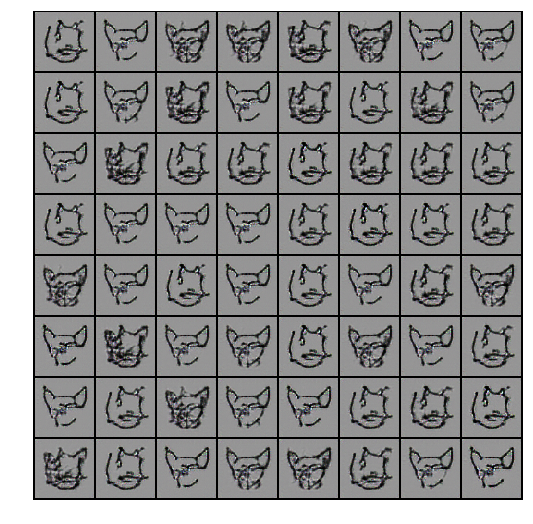

In [20]:
render_samples('quickdraw_samples')

In [4]:
g = Generator(act=GRelu(.2)).to(device)
d = Discriminator().to(device)
batch = next(iter(quickdraw_dl))

In [8]:
d(batch[0].cuda())

tensor([0.7941, 0.8374, 0.2915, 0.4340, 0.7547, 0.4083, 0.5258, 0.5777, 0.5237,
        0.5858, 0.8557, 0.4275, 0.7762, 0.5969, 0.3853, 0.7607, 0.8057, 0.2941,
        0.6168, 0.4394, 0.8440, 0.5079, 0.7587, 0.7847, 0.6544, 0.8915, 0.6139,
        0.2116, 0.7719, 0.9448, 0.6619, 0.7768, 0.5729, 0.7813, 0.7076, 0.6796,
        0.3886, 0.6753, 0.7641, 0.8631, 0.8385, 0.6737, 0.6565, 0.9156, 0.4597,
        0.8198, 0.7405, 0.6239, 0.7383, 0.6677, 0.7112, 0.8068, 0.6791, 0.5299,
        0.2680, 0.4090, 0.7622, 0.6480, 0.4427, 0.7088, 0.8694, 0.2596, 0.3769,
        0.9182], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [15]:
d(batch[0][:, :1, :, :])

RuntimeError: Given groups=1, weight of size 64 3 4 4, expected input[64, 1, 64, 64] to have 3 channels, but got 1 channels instead